In [2]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
import pandas as pd
# load dataset
#Read the data

train_data = pd.read_csv('C:\\Users\\ECR\Desktop\\Lab_ML&_speech_tech\\Lab7\\Fashion_MNIST_dev\\archive\\fashion-mnist_train.csv')
test_data = pd.read_csv('C:\\Users\\ECR\Desktop\\Lab_ML&_speech_tech\\Lab7\\Fashion_MNIST_dev\\archive\\fashion-mnist_test.csv')

In [3]:
train_data.shape, test_data.shape

((60000, 785), (10000, 785))

In [4]:
trainX = train_data.iloc[:, 1:]
trainY = train_data.iloc[:, 0]
testX = test_data.iloc[:, 1:]
testY = test_data.iloc[:, 0]

In [5]:
trainY

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [6]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# pyplot.imshow(trainX[1], cmap=pyplot.get_cmap('gray'))

In [4]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = 'Adam'#SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# # evaluate a model using k-fold cross-validation
# def evaluate_model(dataX, dataY, n_folds=5):
# 	scores, histories = list(), list()
# 	# prepare cross validation
# 	kfold = KFold(n_folds, shuffle=True, random_state=1)
# 	# enumerate splits
# 	for train_ix, test_ix in kfold.split(dataX):
# 		# define model
# 		model = define_model()
# 		# select rows for train and test
# 		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
# 		# fit model
# 		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
# 		# evaluate model
# 		_, acc = model.evaluate(testX, testY, verbose=0)
# 		print('&gt; %.3f' % (acc * 100.0))
# 		# stores scores
# 		scores.append(acc)
# 		histories.append(history)
# 	return scores, histories

# # plot diagnostic learning curves
# def summarize_diagnostics(histories):
# 	for i in range(len(histories)):
# 		# plot loss
# 		pyplot.subplot(2, 1, 1)
# 		pyplot.title('Cross Entropy Loss')
# 		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
# 		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
# 		# plot accuracy
# 		pyplot.subplot(2, 1, 2)
# 		pyplot.title('Classification Accuracy')
# 		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
# 		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
# 	pyplot.show()

# # summarize model performance
# def summarize_performance(scores):
# 	# print summary
# 	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# 	# box and whisker plots of results
# 	pyplot.boxplot(scores)
# 	pyplot.show()

# # run the test harness for evaluating a model
# def run_test_harness():
# 	# load dataset
# 	trainX, trainY, testX, testY = load_dataset()
# 	# prepare pixel data
# 	trainX, testX = prep_pixels(trainX, testX)
# 	# evaluate model
# 	scores, histories = evaluate_model(trainX, trainY)
# 	# learning curves
# 	summarize_diagnostics(histories)
# 	# summarize estimated performance
# 	summarize_performance(scores)

# # entry point, run the test harness
# run_test_harness()

In [8]:
trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
model = define_model()

history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 0.1463 - acc: 0.9542 - val_loss: 0.0665 - val_acc: 0.9788
Epoch 2/10
 - 13s - loss: 0.0492 - acc: 0.9845 - val_loss: 0.0488 - val_acc: 0.9835
Epoch 3/10
 - 13s - loss: 0.0305 - acc: 0.9905 - val_loss: 0.0535 - val_acc: 0.9839
Epoch 4/10
 - 12s - loss: 0.0195 - acc: 0.9935 - val_loss: 0.0419 - val_acc: 0.9868
Epoch 5/10
 - 10s - loss: 0.0142 - acc: 0.9950 - val_loss: 0.0547 - val_acc: 0.9847
Epoch 6/10
 - 12s - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0506 - val_acc: 0.9861
Epoch 7/10
 - 11s - loss: 0.0075 - acc: 0.9977 - val_loss: 0.0525 - val_acc: 0.9852
Epoch 8/10
 - 11s - loss: 0.0053 - acc: 0.9984 - val_loss: 0.0557 - val_acc: 0.9868
Epoch 9/10
 - 11s - loss: 0.0055 - acc: 0.9981 - val_loss: 0.0658 - val_acc: 0.9853
Epoch 10/10
 - 12s - loss: 0.0046 - acc: 0.9984 - val_loss: 0.0613 - val_acc: 0.9872


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [45]:
_, acc = model.evaluate(testX, testY, verbose=0)
acc

0.9872

In [51]:
testX.shape

(10000, 28, 28, 1)

In [65]:
# Test 
test_image = testX[52]

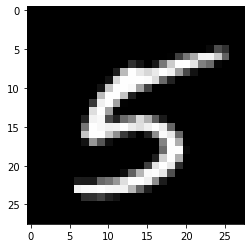

In [66]:
pyplot.imshow(test_image, cmap=pyplot.get_cmap('gray'))

In [67]:
import numpy as np
test_image=np.reshape(test_image,(1,28,28,1))

In [68]:
y_pred = model.predict(test_image)
predicted_digit = np.argmax(y_pred, axis=1)
print(predicted_digit)

[5]
